In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

import warnings
warnings.filterwarnings("ignore")

# Датасет

Набор изображений цифр от 0 до 9. Для обучения используется 1797 изображений 8 на 8 пикселей

In [2]:
digits = load_digits()
df = pd.DataFrame(digits['data'])
cols = [f"pix_{i}" for i in range(64)]
df.columns = cols

In [3]:
df.head()

,pix_0,pix_1,pix_2,pix_3,pix_4,pix_5,pix_6,pix_7,pix_8,pix_9,pix_10,pix_11,pix_12,pix_13,pix_14,pix_15,pix_16,pix_17,pix_18,pix_19,pix_20,pix_21,pix_22,pix_23,pix_24,pix_25,pix_26,pix_27,pix_28,pix_29,pix_30,pix_31,pix_32,pix_33,pix_34,pix_35,pix_36,pix_37,pix_38,pix_39,pix_40,pix_41,pix_42,pix_43,pix_44,pix_45,pix_46,pix_47,pix_48,pix_49,pix_50,pix_51,pix_52,pix_53,pix_54,pix_55,pix_56,pix_57,pix_58,pix_59,pix_60,pix_61,pix_62,pix_63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


# EDA

In [4]:
df.describe()

,pix_0,pix_1,pix_2,pix_3,pix_4,pix_5,pix_6,pix_7,pix_8,pix_9,pix_10,pix_11,pix_12,pix_13,pix_14,pix_15,pix_16,pix_17,pix_18,pix_19,pix_20,pix_21,pix_22,pix_23,pix_24,pix_25,pix_26,pix_27,pix_28,pix_29,pix_30,pix_31,pix_32,pix_33,pix_34,pix_35,pix_36,pix_37,pix_38,pix_39,pix_40,pix_41,pix_42,pix_43,pix_44,pix_45,pix_46,pix_47,pix_48,pix_49,pix_50,pix_51,pix_52,pix_53,pix_54,pix_55,pix_56,pix_57,pix_58,pix_59,pix_60,pix_61,pix_62,pix_63
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,10.382304,11.979410,10.279354,8.175849,1.846411,0.107958,0.002782,2.601558,9.903172,6.992766,7.097941,7.806344,1.788536,0.050083,0.001113,2.469672,9.091263,8.821369,9.927101,7.551475,2.317752,0.002226,0.0,2.339455,7.667223,9.071786,10.301614,8.744018,2.909293,0.0,0.008904,1.583751,6.881469,7.228158,7.672231,8.236505,3.456316,0.027268,0.007234,0.704508,7.506956,9.539232,9.416249,8.758486,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,5.421456,3.977543,4.782681,6.052960,3.586321,0.827915,0.062368,3.576301,5.690767,5.802662,6.175729,6.197322,3.259870,0.438597,0.033352,3.146532,6.192038,5.882936,6.152093,5.872556,3.686456,0.047140,0.0,3.480372,6.324687,6.268391,5.933490,5.870648,3.537283,0.0,0.145185,2.981816,6.537955,6.441378,6.259511,5.695527,4.330951,0.307356,0.204223,1.746153,5.644496,5.226948,5.302048,6.031154,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,9.000000,7.000000,2.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,4.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,3.000000,6.000000,3.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2.000000,5.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,12.000000,13.000000,11.000000,9.000000,0.000000,0.000000,0.000000,1.000000,12.000000,6.000000,6.000000,8.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,12.000000,7.000000,0.000000,0.000000,0.0,0.000000,8.000000,10.000000,13.000000,10.000000,1.000000,0.0,0.000000,0.000000,6.000000,7.000000,8.000000,9.000000,1.000000,0.000000,0.000000,0.000000,8.000000,10.000000,10.000000,10.000000,1.000000,0.000000,0.000000,0.000000,4.0

In [5]:
# Нет пустых значений
df.isnull().sum()

pix_0     0
pix_1     0
pix_2     0
pix_3     0
pix_4     0
         ..
pix_59    0
pix_60    0
pix_61    0
pix_62    0
pix_63    0
Length: 64, dtype: int64

In [6]:
# Так же нет дубликатов
df.duplicated().sum()

0

In [7]:
X = df
y = pd.Series(digits['target'])

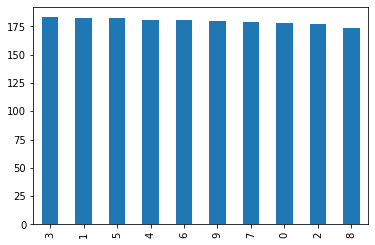

In [8]:
y.value_counts().plot.bar()

In [9]:
#Масштабируем значения пикселей
X = X / 16
X.head()

,pix_0,pix_1,pix_2,pix_3,pix_4,pix_5,pix_6,pix_7,pix_8,pix_9,pix_10,pix_11,pix_12,pix_13,pix_14,pix_15,pix_16,pix_17,pix_18,pix_19,pix_20,pix_21,pix_22,pix_23,pix_24,pix_25,pix_26,pix_27,pix_28,pix_29,pix_30,pix_31,pix_32,pix_33,pix_34,pix_35,pix_36,pix_37,pix_38,pix_39,pix_40,pix_41,pix_42,pix_43,pix_44,pix_45,pix_46,pix_47,pix_48,pix_49,pix_50,pix_51,pix_52,pix_53,pix_54,pix_55,pix_56,pix_57,pix_58,pix_59,pix_60,pix_61,pix_62,pix_63
0,0.0,0.0,0.3125,0.8125,0.5625,0.0625,0.0,0.0,0.0,0.0,0.8125,0.9375,0.6250,0.9375,0.3125,0.0,0.0,0.1875,0.9375,0.1250,0.0000,0.6875,0.500,0.0,0.0,0.2500,0.7500,0.0000,0.0000,0.5000,0.5,0.0,0.0,0.3125,0.5000,0.0000,0.0000,0.5625,0.5000,0.0,0.0,0.2500,0.6875,0.0,0.0625,0.750,0.4375,0.0,0.0,0.1250,0.8750,0.3125,0.6250,0.7500,0.0000,0.0,0.0,0.0,0.3750,0.8125,0.6250,0.0000,0.0000,0.0
1,0.0,0.0,0.0000,0.7500,0.8125,0.3125,0.0,0.0,0.0,0.0,0.0000,0.6875,1.0000,0.5625,0.0000,0.0,0.0,0.0000,0.1875,0.9375,1.0000,0.3750,0.000,0.0,0.0,0.4375,0.9375,1.0000,1.0000,0.1250,0.0,0.0,0.0,0.0000,0.0625,1.0000,1.0000,0.1875,0.0000,0.0,0.0,0.0000,0.0625,1.0,1.0000,0.375,0.0000,0.0,0.0,0.0000,0.0625,1.0000,1.0000,0.3750,0.0000,0.0,0.0,0.0,0.0000,0.6875,1.0000,0.6250,0.0000,0.0
2,0.0,0.0,0.0000,0.2500,0.9375,0.7500,0.0,0.0,0.0,0.0,0.1875,1.0000,0.9375,0.8750,0.0000,0.0,0.0,0.0000,0.5000,0.8125,0.5000,1.0000,0.000,0.0,0.0,0.0000,0.0625,0.3750,0.9375,0.6875,0.0,0.0,0.0,0.0625,0.5000,0.8125,0.9375,0.0625,0.0000,0.0,0.0,0.5625,1.0000,1.0,0.3125,0.000,0.0000,0.0,0.0,0.1875,0.8125,1.0000,1.0000,0.6875,0.3125,0.0,0.0,0.0,0.0000,0.1875,0.6875,1.0000,0.5625,0.0
3,0.0,0.0,0.4375,0.9375,0.8125,0.0625,0.0,0.0,0.0,0.5,0.8125,0.3750,0.9375,0.2500,0.0000,0.0,0.0,0.1250,0.0625,0.8125,0.8125,0.0000,0.000,0.0,0.0,0.0000,0.1250,0.9375,0.6875,0.0625,0.0,0.0,0.0,0.0000,0.0000,0.0625,0.7500,0.7500,0.0625,0.0,0.0,0.0000,0.0000,0.0,0.0625,0.625,0.5000,0.0,0.0,0.0000,0.5000,0.2500,0.3125,0.8750,0.5625,0.0,0.0,0.0,0.4375,0.8125,0.8125,0.5625,0.0000,0.0
4,0.0,0.0,0.0000,0.0625,0.6875,0.0000,0.0,0.0,0.0,0.0,0.0000,0.4375,0.5000,0.0000,0.0000,0.0,0.0,0.0000,0.0625,0.8125,0.3750,0.1250,0.125,0.0,0.0,0.0000,0.4375,0.9375,0.0000,0.5625,0.5,0.0,0.0,0.3125,1.0000,0.6250,0.0000,1.0000,0.3750,0.0,0.0,0.2500,0.9375,1.0,0.8125,1.000,0.0625,0.0,0.0,0.0000,0.0000,0.1875,0.9375,0.6250,0.0000,0.0,0.0,0.0,0.0000,0.1250,1.0000,0.2500,0.0000,0.0


# PCA & t-SNE

In [10]:
# Отображение результатов
def display_results(labels, X, title):
    plt.figure(figsize=(13, 11))
    plt.scatter(X[:, 0], X[:, 1], c=labels,
                edgecolor='none', alpha=0.7, s=40,
                cmap=plt.cm.get_cmap('nipy_spectral', 10))
    plt.colorbar()
    plt.title(title)

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)

pca.fit(X)
X_pca = pca.transform(X)

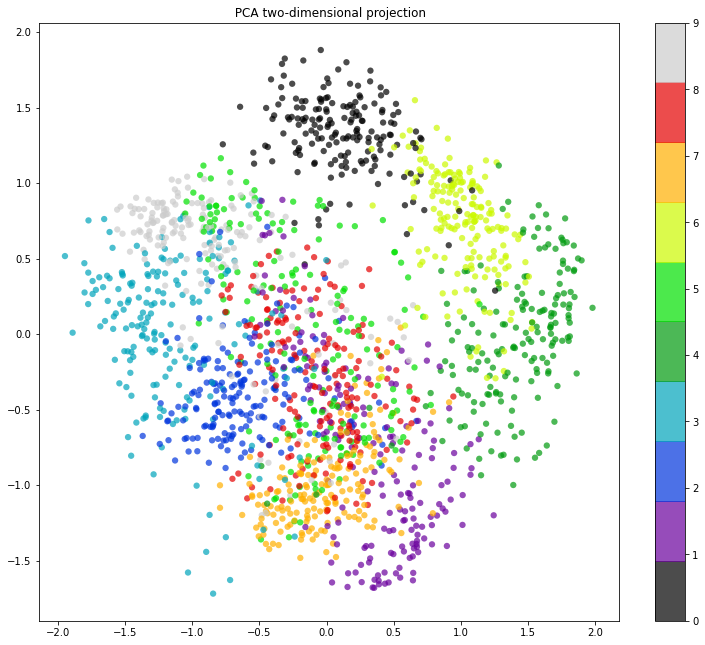

In [12]:
display_results(y, X_pca," PCA two-dimensional projection")

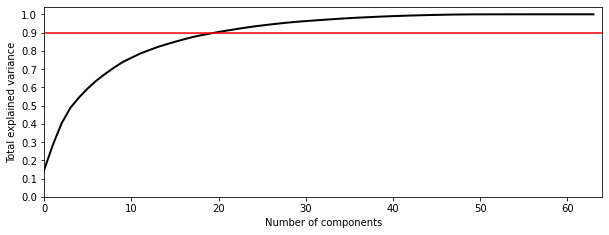

In [13]:
pca = PCA().fit(X)

plt.figure(figsize=(10,3.5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 8*8)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axhline(0.9, c='r')

Визуализируем, как выборочная дисперсия зависит от числа компонент

Судя по графику, для сохранения >90% лучше брать n_components>20

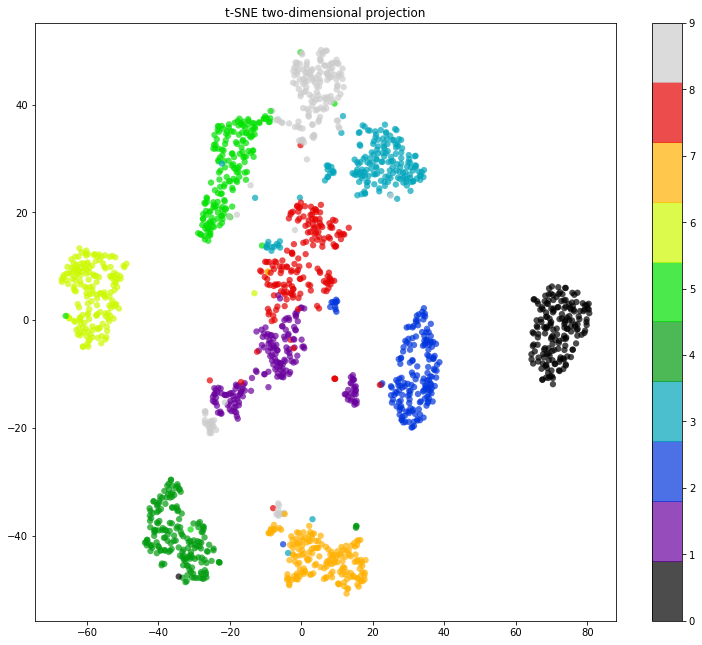

In [14]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state=42)
X_tsne = tsne.fit_transform(X_pca)
display_results(y, X_tsne,"t-SNE two-dimensional projection")

# Готовые реализации

In [15]:
import itertools
import time
import numpy as np
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, fowlkes_mallows_score
from sklearn.base import clone
from sklearn.decomposition import PCA

def train(est, params, X):
    results = []

    for n_components in [10, 20, 40, 64]:
        x = PCA(n_components=n_components).fit_transform(X[cols])
        best_ari = -1
        best_ami = -1
        best_fmi = -1
        best_param = None
        mean_fit_predict_time = 0

        for param_combination in itertools.product(*params.values()):
            param_dict = dict(zip(params.keys(), param_combination))
            e = clone(est).set_params(**param_dict)
            start_time = time.perf_counter()
            pred = e.fit_predict(x)
            pred_time = (time.perf_counter() - start_time)
            mean_fit_predict_time += pred_time

            ari = adjusted_rand_score(y, pred)
            ami = adjusted_mutual_info_score(y, pred)
            fmi = fowlkes_mallows_score(y, pred)

            if ari > best_ari:
                best_ari = ari
            if ami > best_ami:
                best_ami = ami
            if fmi > best_fmi:
                best_fmi = fmi
                best_param = param_dict

        mean_fit_predict_time /= len(params)
        res = {
            "cluster": est.__class__.__name__,
            "dimension": n_components,
            "mean fit predict time, s": mean_fit_predict_time,
            "best ari": best_ari,
            "best ami": best_ami,
            "best fmi": best_fmi,
            "best_param": best_param
        }
        results.append(res)
    return results

Проходим по всем комбинациям параметров и сохраняем лучшие метрики и время работы

В качесте метрик используем:

Adjusted Rand Index (ARI)

Adjusted Mutual Information (AMI)

Fowlkes-Mallows Index (FMI)

## KMeans

In [16]:
from sklearn.cluster import KMeans

k_mean = train(
    KMeans(n_clusters=10, random_state=0),
    {"algorithm": ["lloyd", "elkan"]},
    X
)

## DBSCAN

In [17]:
from sklearn.cluster import SpectralClustering

dbscan = train(
    SpectralClustering(n_jobs=4, n_clusters=10),
    {
        "eigen_solver": ("arpack", "lobpcg"),
        "assign_labels": ("kmeans", "discretize")
    },
    X
)

# Своя реализация

In [18]:
import numpy as np
from sklearn.base import BaseEstimator, ClusterMixin

class MyKMeans(BaseEstimator, ClusterMixin):
    def __init__(self, n_clusters, max_iter=300, random_state=None):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state

    def fit(self, X):
        if self.random_state:
            np.random.seed(self.random_state)
        # Инициализируем центроиды случайным образом
        self.centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]
        
        for _ in range(self.max_iter):
            # Вычисляем расстояние между данными и центроидами и берем ближайший
            distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
            labels = np.argmin(distances, axis=1)

            # Обновляем центроиды до средних значений данных в каждом кластере
            new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(self.n_clusters)])

            # Проверка на сходимость
            if np.all(self.centroids == new_centroids):
                break

            self.centroids = new_centroids

        self.labels_ = labels
        return self

    def predict(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        return labels

In [19]:
my_kmeans = train(
    MyKMeans(n_clusters=10,random_state=42),
    {"max_iter": [300, 500]},
    X
)

# Результаты

In [20]:
results = pd.DataFrame(k_mean + dbscan + my_kmeans)

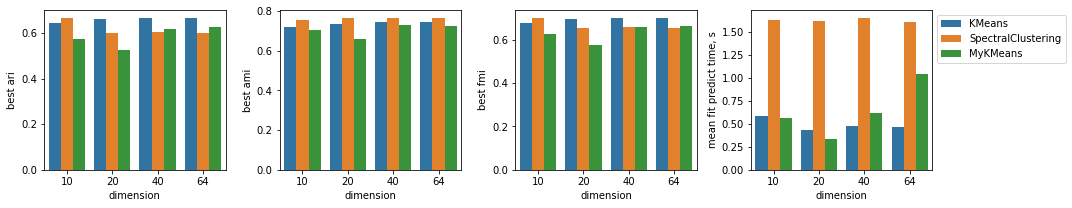

In [21]:
import seaborn as sns

metrics = ["best ari", "best ami", "best fmi", "mean fit predict time, s"]
fig, axs = plt.subplots(1, len(metrics), figsize=(15, 3))

for metric, ax in zip(metrics, axs):
    sns.barplot(data=results, x="dimension", y=metric, hue="cluster", ax=ax)
    if metric == "mean fit predict time, s":
        ax.legend(loc="upper left", bbox_to_anchor=(1, 1))
    else:
        ax.get_legend().remove()

plt.tight_layout()
plt.show()

Все алгоритмы работают примерно одинаково, судя по метрикам 

Нельзя сказать, что из-за изменения размерности результат где-то падает

Дольше всего работает SpectralClustering

# Интерпретация работы кастомного KMeans

In [22]:
from sklearn.metrics import pairwise_distances
from sklearn.metrics import classification_report

<Figure size 432x288 with 0 Axes>

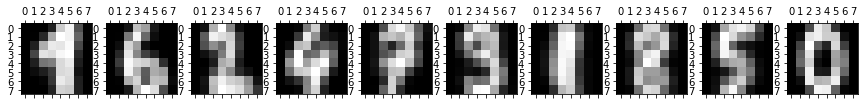

In [26]:
mykmeans = MyKMeans(n_clusters=10, max_iter=300)
mykmeans.fit(X[cols].to_numpy())

plt.gray()
f, axarr = plt.subplots(1, 10, figsize=(15, 30))
for i in range(10):
    axarr[i].matshow(mykmeans.centroids[i].reshape(8, 8))

Если отобразить получившиеся центры выглядят как цифрф от 0 до 9

In [40]:
# Основываясь на том, как выглядят центры кластеров, 
# можно попробовать использовать получившуюся модель как классификатор и взглянуть на его метрики
cluster2num = {
    0:9,
    1:6,
    2:2,
    3:4,
    4:7,
    5:3,
    6:1,
    7:8,
    8:5,
    9:0
}
y_pred = np.array([cluster2num[num] for num in mykmeans.predict(X[cols].to_numpy())])

In [41]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       178
           1       0.81      0.55      0.66       182
           2       0.83      0.84      0.83       177
           3       0.43      0.88      0.58       183
           4       0.98      0.91      0.94       181
           5       0.92      0.76      0.83       182
           6       0.97      0.97      0.97       181
           7       0.87      0.92      0.89       179
           8       0.78      0.78      0.78       174
           9       0.24      0.11      0.15       180

    accuracy                           0.77      1797
   macro avg       0.78      0.77      0.76      1797
weighted avg       0.78      0.77      0.76      1797



В целом модель хорошо справляется с некоторыми классами (например, класс 0, класс 2, класс 4, класс 5, класс 6, класс 7 и класс 8), но испытывает трудности с другими (например, класс 1, класс 3 и класс 9). Взвешенное среднее значение F1-меры составляет 0,77, что указывает на разумную общую производительность.